<span style="color: green">Author: Ashkan Nikfarjam</span>

Now that we have our data we are going to do AHP analysis that act as feature selection

ahp.py has all the functions to calculate AHP for us.

* <span style="color: green">Two-Sample t-Test:</span>

Purpose: Identifies statistically significant differences in gene expression between two groups (e.g., cancerous vs. healthy cells).

Method: Compares the means of two independent samples using the t-statistic.

Output: A t-score and p-value. A small p-value indicates significant differences in expression.

* <span style="color: green">Entropy Test:</span>

Purpose: Measures the disorder in gene expression levels.

Method: Computes entropy using histogram-based probability distributions.

Output: Higher entropy values indicate genes with more variability, which are more useful for classification.

* <span style="color: green">Wilcoxon Rank-Sum Test:</span>

Purpose: A non-parametric test used to rank genes based on their median expression differences.

Method: Compares the ranks of two independent samples instead of their means.

Output: A Wilcoxon statistic and a p-value. A low p-value suggests significant differences in gene ranks.

* <span style="color: green">Signal-to-Noise Ratio (SNR):</span>

Purpose: Compares the difference in mean expression levels relative to the standard deviation.

Method: SNR is calculated as the difference between the means of two groups divided by the sum of their standard deviations.

Output: A higher SNR suggests that the gene has a strong discriminatory power between groups.

* <span style="color: green">AHP Weighted Ranking:</span>

Purpose: Integrates statistical measures into a single weighted ranking system to prioritize significant genes.

Method: Normalizes scores across all statistical tests and applies predefined weights.

Output: A final ranking score indicating the importance of each gene in classification.

Try with moded AHP

<span style="color: green">This the correct calculation</span>

In [1]:
import ahp 
import pandas as pd
import numpy as np

#load datasets
mutated_df = pd.read_csv("./data/mutatedDataSet.CSV", index_col=0)  # Cancer data
benign_df = pd.read_csv("./data/normalDataset.CSV", index_col=0)  # Healthy data
# Compute AHP scores
#top_genes, ahp_scores = ahp.ahp_gene_selection(mutated_df.values, benign_df.values, top_n=mutated_df.shape[0])

# Create DataFrame with results
results_df = pd.DataFrame({
    "Gene": mutated_df.index.tolist(),  # Ensure it works correctly
    "T_Score": ahp.compute_t_test(mutated_df.values, benign_df.values),
    "Entropy": ahp.compute_entropy(mutated_df.values, benign_df.values),
    "ROC_AUC": ahp.compute_roc_auc(mutated_df.values, benign_df.values),
    "Wilcoxon": ahp.compute_wilcoxon(mutated_df.values, benign_df.values),
    "SNR": ahp.compute_snr(mutated_df.values, benign_df.values),
    "AHP_Score": ahp.compute_ahp_weighted_ranking(mutated_df.values, benign_df.values)
})

print(results_df.head())

Before Normalization:
NaN in scores: 540
T-Test NaN count: 540
Entropy NaN count: 0
ROC_AUC NaN count: 0
Wilcoxon NaN count: 0
SNR NaN count: 0
After Normalization:
NaN in normalized scores: 540
Final AHP Rankings NaN count: 540
          Gene    T_Score     Entropy   ROC_AUC    Wilcoxon       SNR  \
0  1/2-SBSRNA4   0.689862    2.696670  0.431422   84.488268  0.028173   
1         A1BG  14.918537  248.955772  0.798042  367.187581  0.436874   
2     A1BG-AS1   5.487732    1.564432  0.613158  139.410757  0.234907   
3         A1CF   0.126623    0.063398  0.442462   70.886743  0.005238   
4        A2LD1   2.457139    6.593280  0.471652   34.924545  0.081503   

   AHP_Score  
0   0.120588  
1   0.403851  
2   0.222456  
3   0.112992  
4   0.127181  


In [14]:
results_df

,Gene,T_Score,Entropy,ROC_AUC,Wilcoxon,SNR,AHP_Score
0,1/2-SBSRNA4,0.689862,2.696670,0.431422,84.488268,0.028173,0.120588
1,A1BG,14.918537,248.955772,0.798042,367.187581,0.436874,0.403851
2,A1BG-AS1,5.487732,1.564432,0.613158,139.410757,0.234907,0.222456
3,A1CF,0.126623,0.063398,0.442462,70.886743,0.005238,0.112992
4,A2LD1,2.457139,6.593280,0.471652,34.924545,0.081503,0.127181
...,...,...,...,...,...,...,...
23363,ZYG11B,8.404825,62.197572,0.206371,361.750868,0.472383,0.254365
23364,ZYX,7.578861,11722.125912,0.275934,276.049570,0.368290,0.224430
23365,ZZEF1,11.370266,65.988679,0.208918,358.613554,0.516351,0.273365
23366,ZZZ3,5.090598,359.859440,0.330320,209.045497,0.229146,0.185421


In [15]:
results_df.shape

(23368, 7)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



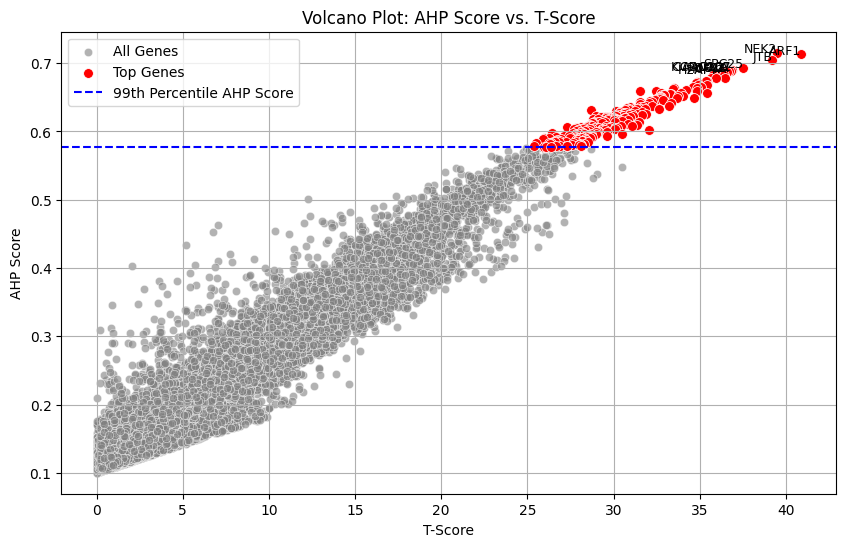

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort by AHP Score (Highest Importance First)
data=results_df.copy()
# Sort by AHP Score and define threshold for top genes (e.g., top 1%)
top_n = int(len(data) * 0.01)  # Top 1% genes
top_genes = data.nlargest(top_n, 'AHP_Score')

# Create Volcano Plot
plt.figure(figsize=(10, 6))

# Scatter plot for all genes
sns.scatterplot(x=data["T_Score"], y=data["AHP_Score"], color="gray", alpha=0.6, label="All Genes")

# Highlight top genes
sns.scatterplot(x=top_genes["T_Score"], y=top_genes["AHP_Score"], color="red", label="Top Genes", s=50)

# Add labels for the top 10 genes
for _, row in top_genes.nlargest(10, 'AHP_Score').iterrows():
    plt.text(row["T_Score"], row["AHP_Score"], row["Gene"], fontsize=9, ha='right')

# Labels and formatting
plt.xlabel("T-Score")
plt.ylabel("AHP Score")
plt.title("Volcano Plot: AHP Score vs. T-Score")
plt.axhline(y=data["AHP_Score"].quantile(0.99), color="blue", linestyle="dashed", label="99th Percentile AHP Score")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [26]:
import plotly.express as px
# Selecting top genes based on AHP Score for visualization
top_genes_df = results_df.nlargest(200, 'AHP_Score')  # Selecting top 100 most expressive genes

# Creating an interactive scatter plot
fig = px.scatter(
    top_genes_df,
    x="T_Score",
    y="Entropy",
    size="ROC_AUC",
    color="AHP_Score",
    hover_data=["Gene", "Wilcoxon", "SNR", "AHP_Score"],
    title="Top 200 Most Expressive Genes Ranked by AHP Score",
    labels={"T_Score": "T Score", "Entropy": "Entropy", "ROC_AUC": "ROC AUC", "AHP_Score": "AHP Score"},
    color_continuous_scale="Viridis"
)

# Display interactive plot
fig.show()

As we can visually see the geen that has ranked the highest is ARF1. ADP-ribosylation factor 1 (ARF1) is a protein that helps regulate vesicle formation and transport.

Function: 
* ARF1 is a key regulator of vesicle formation at the Golgi
* It's involved in intra-Golgi transport
* It's involved in retrograde transport between the Golgi and the endoplasmic reticulum
* It's involved in messenger RNA transport
* It's involved in mTORC1 activity
* It's involved in mitochondrial dynamics and transport

The Golgi apparatus, also known as the Golgi body or Golgi complex, is an organelle in cells that processes and packages proteins and lipids. 

Function: 
* Prepares proteins and lipids for use inside and outside the cell
* Processes and sorts proteins for transport to their destinations
* Synthesizes glycolipids and sphingomyelin
* Synthesizes complex polysaccharides of the cell wall in plant cells

In [27]:
results_df.head()

,Gene,T_Score,Entropy,ROC_AUC,Wilcoxon,SNR,AHP_Score
0,1/2-SBSRNA4,0.689862,2.696670,0.431422,84.488268,0.028173,0.120588
1,A1BG,14.918537,248.955772,0.798042,367.187581,0.436874,0.403851
2,A1BG-AS1,5.487732,1.564432,0.613158,139.410757,0.234907,0.222456
3,A1CF,0.126623,0.063398,0.442462,70.886743,0.005238,0.112992
4,A2LD1,2.457139,6.593280,0.471652,34.924545,0.081503,0.127181


In [28]:
results_df.to_csv("./data/AHPRankedGenes.csv", index=False)